In [1]:
!git clone https://github.com/MetroCat69/Zahal_Bert
!pip install datasets

Cloning into 'Zahal_Bert'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 38 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), 5.26 MiB | 6.39 MiB/s, done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datasets import load_dataset


In [3]:
dataset = load_dataset("MetroCat/HEBREW-MIL-CLEAN")['train']

  0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
from collections import Counter
from tqdm import tqdm
import numpy as np
def count_sub_string(strings, sub_strings):
    counts = np.zeros(len(sub_strings), dtype=int)

    for string in tqdm(strings):
        for i, substring in enumerate(sub_strings):
            counts[i] += string.count(substring)

    count_dict = dict(zip(sub_strings, counts))
    return count_dict

file_contents = [file['context'] for file in dataset]
sub_strings = open('/content/Zahal_Bert/get_tokens_from_milon/tokens.txt','r').read().split(';')

result = count_sub_string(file_contents, sub_strings)
print(result)

100%|██████████| 1075/1075 [34:12<00:00,  1.91s/it]

{'מקרו': 910, 'גשות': 2207, 'מטכליים': 11, 'בתעשייה': 298, 'צאיהגו': 0, 'Public': 224, 'מופעי': 216, 'Device': 12, 'המפורטות': 284, 'HEP': 2, 'ניקוז': 79, 'אמתהתן': 0, 'דהב': 171, 'portable': 1, 'נשר': 1113, 'מבקשת': 292, 'vehicle': 59, 'ומיפוי': 49, 'האסטרטגית': 2156, 'מטרתו': 1055, 'תעופתית': 284, 'נכ': 34636, 'trinitrotoluene': 0, 'FIST': 0, 'Command': 335, 'מםתיו': 0, 'afloat': 0, 'הזמנה': 546, 'division': 14, 'סבירות': 721, 'לעיל': 5429, 'הזעזועים': 69, 'targeting': 14, 'estimate': 7, 'דרמז': 2, 'conventional': 8, 'הרציפות': 74, 'קדמיתפרצ': 0, 'מתקדמים': 1902, 'מנגד': 1281, 'חידושי': 550, 'האווירי': 5740, 'קורנים': 27, 'Zא': 5, 'סדרה': 937, 'ordering': 0, 'לייצב': 157, 'המפעל': 613, 'תפיסתי': 1269, 'UUV': 5, 'גל': 68749, 'מטאורולוגי': 631, 'מפלז': 0, 'Assistant': 5, 'מקובצת': 8, 'assault': 7, 'requset': 0, 'Bacillus': 0, 'TP': 77, 'DD': 1965, 'חנע': 10, 'בלתיכשיר': 0, 'עמראו': 0, 'לאגרעיני': 0, 'נפילות': 67, 'סטיל': 247, 'מינית': 384, 'הניידת': 66, 'ותפיסה': 46, 'קרקעות': 349, 'מע

In [31]:
import pandas as pd
df = pd.DataFrame({'keys': result.keys(), 'values' : result.values()})

<Axes: >

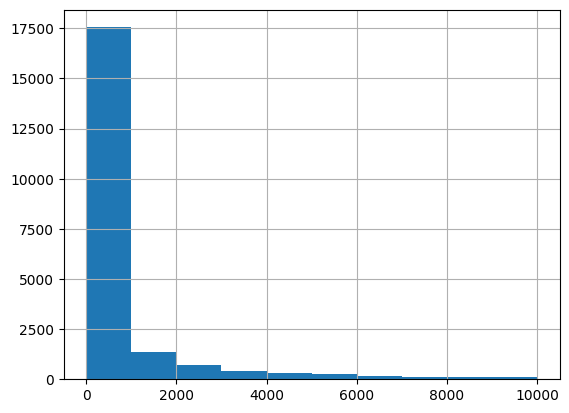

In [39]:
df.loc[df['values']<10000]['values'].hist()

<Axes: >

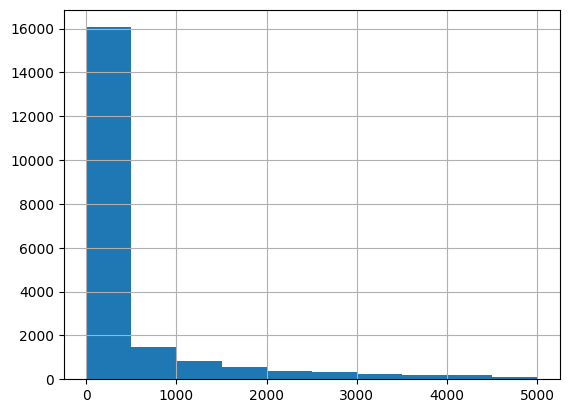

In [40]:
df.loc[df['values']<5000]['values'].hist()

<Axes: >

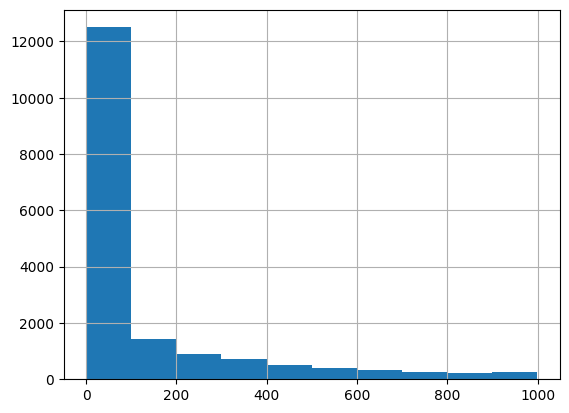

In [41]:
df.loc[df['values']<1000]['values'].hist()

<Axes: >

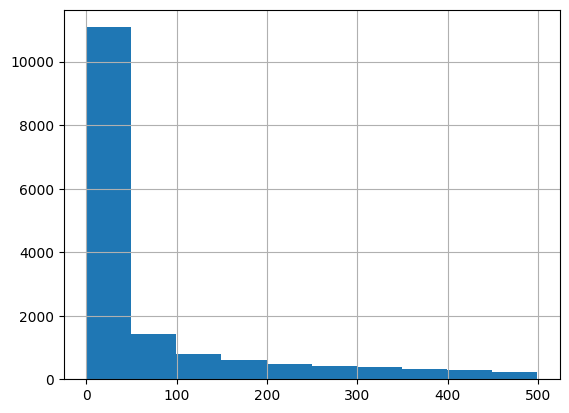

In [42]:
df.loc[df['values']<500]['values'].hist()

<Axes: >

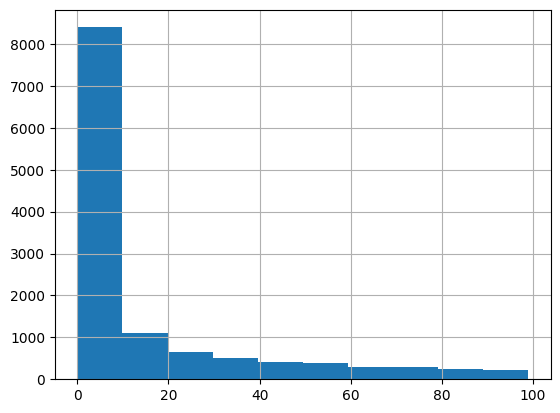

In [44]:
df.loc[df['values']<100]['values'].hist()

In [46]:
len(df.loc[df['values']>100])

9768

In [47]:
len(df.loc[df['values']>50])

11170

In [58]:
at_least_50_ocurences_words = ';'.join(df.loc[df['values']>=50]['keys'].values.tolist())

In [59]:
text_file = open("tokns_that_ocurred_at_least_50_times_in_corpus.txt", "w",encoding="utf8")
text_file.write(at_least_50_ocurences_words)
text_file.close()